<a href="https://colab.research.google.com/github/njue752/Machine-learning/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT 1

First few rows of the dataset:
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  

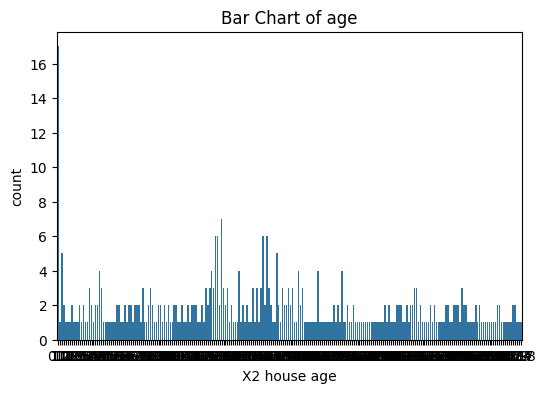

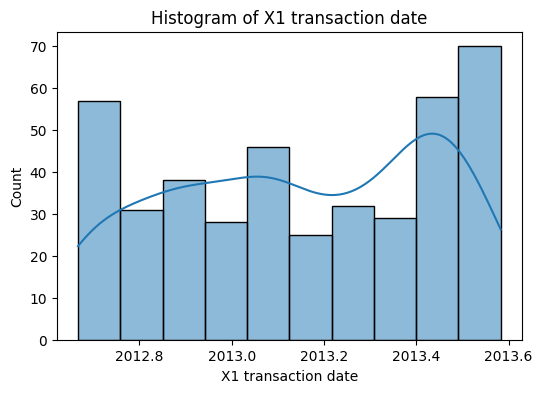

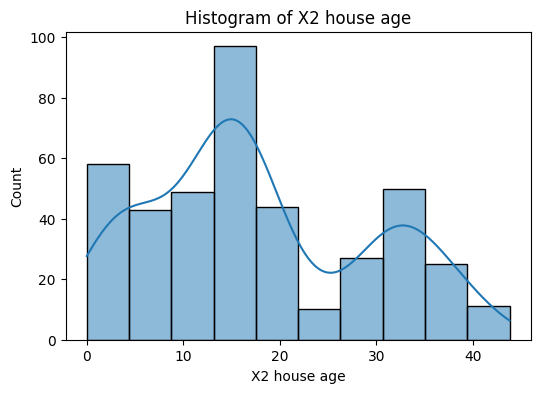

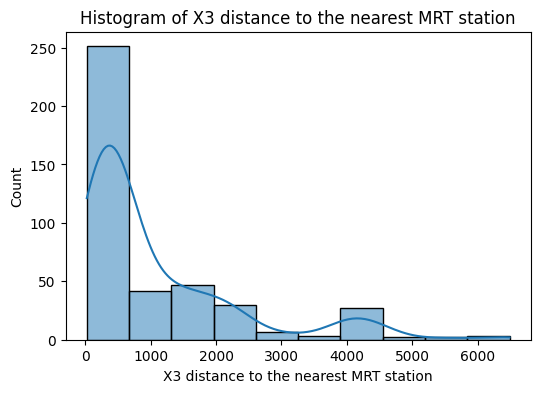

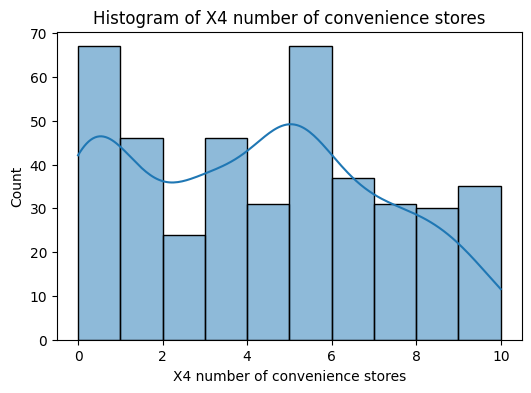

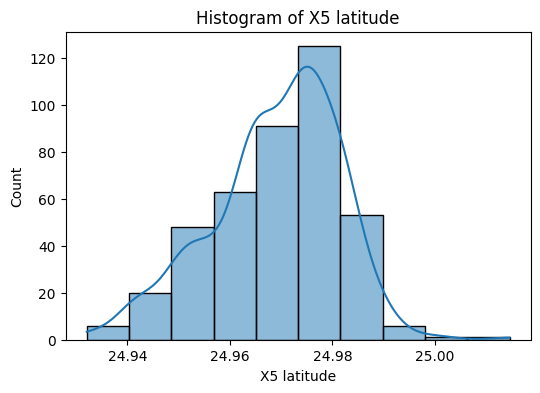

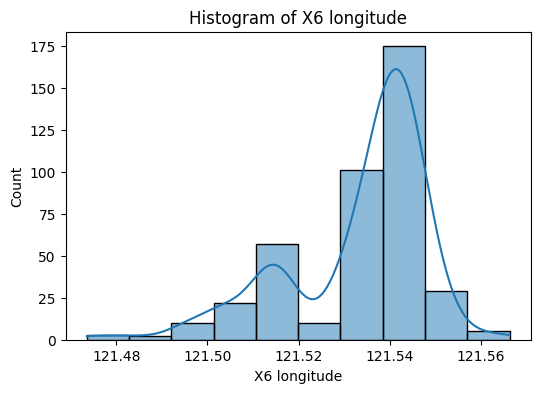

Root Mean Squared Error (RMSE): 8.060888781390494
Mean Squared Error (MSE): 64.97792794594713
Mean Absolute Error (MAE): 5.807059379585299


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error


martin = pd.read_csv('/content/Real estate.csv')
X = martin[["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores","X5 latitude","X6 longitude"]]
y = martin["Y house price of unit area"]

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(martin.head())

# Check the shape of the dataset
print("\nDataset shape:", martin.shape)

# Check the data types of columns
print("\nData types of columns:")
print(martin.dtypes)

# Summary statistics
print("\nSummary statistics of numerical columns:")
print(martin.describe())

# Check for missing values
print("\nMissing values:")
print(martin.isnull().sum())

# Bar charts for 'age' feature
plt.figure(figsize=(6, 4))
sns.countplot(x='X2 house age', data=martin)
plt.title('Bar Chart of age')
plt.show()

# Visualize the continuous variables
continuous_vars = ["X1 transaction date", "X2 house age", "X3 distance to the nearest MRT station", "X4 number of convenience stores","X5 latitude","X6 longitude"]
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(martin[var], bins=10, kde=True)
    plt.title(f'Histogram of {var}')
    plt.show()


# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Create new data point
newdata = pd.DataFrame({
    "X1 transaction date": [2013.5],
    "X2 house age": [31.7],
    "X3 distance to the nearest MRT station": [5512.038],
    "X4 number of convenience stores": [1],
    "X5 latitude":[24.95095],
    "X6 longitude":[121.48458]

})

# Predictions on test set
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Display the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

ASSIGNMENT 2

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


# predictions
rf_predictions = rf_model.predict(X_test)
# Evaluate Random Forest model
rf_mse = mean_squared_error(y_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
# predictions
dt_predictions = dt_model.predict(X_test)
# Evaluate Random Forest model
dt_mse = mean_squared_error(y_test, dt_predictions)
print("Decision Tree Mean Squared Error:", dt_mse)
print("\nPerformance Comparison:")
if rf_mse < dt_mse:
    print("Random Forest better than  Decision Tree.")
elif rf_mse > dt_mse:
    print("Decision Tree is better than Random Forest.")
else:
    print("Both models have similar performance.")

Random Forest Mean Squared Error: 54.560840703725646
Decision Tree Mean Squared Error: 62.36728915662651

Performance Comparison:
Random Forest better than  Decision Tree.
